In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([  5.,  41., 133., 310., 464., 474., 350., 154.,  56.,  13.]),
 array([-0.63212764, -0.40973177, -0.18733589,  0.03505998,  0.25745586,
         0.47985173,  0.70224761,  0.92464348,  1.14703936,  1.36943523,
         1.59183111]),
 <a list of 10 Patch objects>)

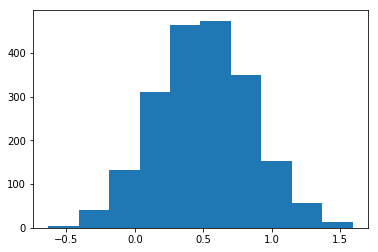

In [23]:
# Generate data from Normal Distribution
y_obs = np.random.normal(loc=0.5,scale=0.35,size=2000)
plt.hist(y_obs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [stdev, mu]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 6000/6000 [00:05<00:00, 1072.70draws/s]


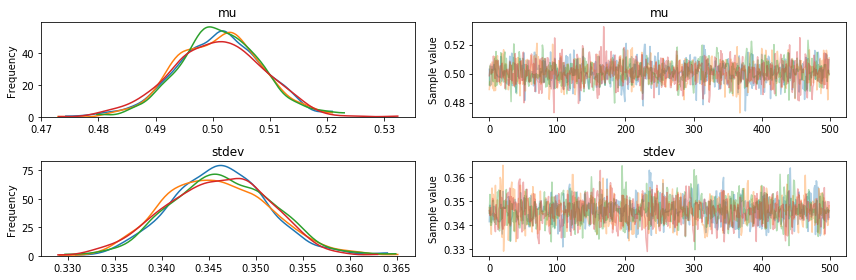

In [24]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0.0, sd=0.5)
    stdev = pm.HalfNormal('stdev', sd=.1)
    
    y = pm.Normal('y',mu=mu, sd=stdev, observed=y_obs)
    trace = pm.sample(500, tune=100)
    pm.traceplot(trace,['mu', 'stdev'])
    plt.show()

In [28]:
trace.get_sampler_stats('stdev')

KeyError: 'Unknown sampler statistic stdev'